In [1]:
import numpy as np
from scipy import constants as c
from scipy import special as sp
from iminuit import Minuit, cost
from argparse import Namespace
import pandas as pd
import os

C:\Users\ricca\AppData\Local\Temp\ipykernel_13248\652678344.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
KB = c.Boltzmann
hbar = c.Planck/2*np.pi

def QT(d_0, q_i, alpha, omega,T):
    csi = (hbar * omega)/(2*KB*T)
    s1 = 4/np.pi * np.exp(-(d_0/KB*T))*np.sinh(csi)*sp.kv(0,csi)
    s2 = 1 - 2*np.exp(-(d_0)/(KB*T)*np.exp(csi))*sp.jv(0,csi)
    return 1/q_0 + 0.5 * alpha * s1/s2 

def retta(x, m, q):
    return m*x + q

def resonance(x, x0, Q, Q_c, phi0):
    num = np.exp(1j*phi0)
    den = 1 + 2*1j*Q*(x-x0)/x0
    return abs(1 - (Q/Q_c)*(num/den))

def model(x,m,q,x0,Q,Q_c,phi0):
    return retta(x,m,q)*resonance(x,x0,Q,Q_c,phi0)

def FWHM(x,y):
    half = max(y) / 2.
    minori = x[np.where(y < half)]
    if len(minori)==0: 
        print('Problema!')
        return 0
    else:
        index1 = min(minori)
        index2 = max(minori)
        return index2 - index1

def mod(x,y):
    return np.sqrt(x**2 + y**2)

def find_min_freq(x,y):
    c = np.array(x)[np.where(np.array(y) == min(np.array(y)))]
    if len(c) > 0:
        print('Problema!')
        return 0
    else:
        return float(c)
    
def Q_stima(x0,w):
    if (((x0 is None) or (w is None)) or w==0):
        print('Problema!')
        return 0
    else:
        return x0/(2*w)
    
def Sort_Tuple(tup):
 
    # getting length of list of tuples
    lst = len(tup)
    for i in range(0, lst):
 
        for j in range(0, lst-i-1):
            if (tup[j][1] > tup[j + 1][1]):
                temp = tup[j]
                tup[j] = tup[j + 1]
                tup[j + 1] = temp
    return tup

In [3]:
folder = 'C:\\Users\\ricca\\Desktop\\MAGISTRALE\\LabIV\\QTLab2324\\IRdetection\\Instruments\\Test_data\\fit_prova\\gap_run12\\'

lista = os.listdir(folder)

dfs,temp = [],[]
count = 0
lista2 = []
for (i,nome) in enumerate(lista):
    var = []
    var.append(i)
    var.append(int(str(nome.split('Q_res')[1].split('.txt')[0])))
    lista2.append(var)
lista2 = Sort_Tuple(lista2)
    
for (i,nome) in lista2:
    if (i % 2 == 0): 
        count = count + 1
        data = pd.read_csv(folder+'Q_res'+str(nome)+'.txt', sep=",")
        data.columns = ['f','i','q']
        dfs.append(data)
        t = 610 - int(i/2)*10
        temp.append(t)

In [4]:
for df in dfs:
    if type(df) is not int:
        col = np.sqrt(np.array(df.loc[:,'i'])*np.array(df.loc[:,'i']) + np.array(df.loc[:,'q'])*np.array(df.loc[:,'q']))
        col2 = np.ones_like(col)*0.001
        df.insert(3,'mod',col)
        df.insert(4,'mod_err',col2)

In [5]:
par, m, new_dfs, new_temp = [], [], [], []
for (i,df) in enumerate(dfs):
    width = FWHM(np.array(df['f']),(np.array(df['mod'])))
    stima_x0 = float(np.array(df['f'])[np.where(np.array(df['mod']) == min(np.array(df['mod'])))])
    stima_Q = Q_stima(stima_x0,width)
    stima_m = ((np.array(df['mod']))[0]-(np.array(df['mod']))[-1])/(np.array(df['f'])[0]-np.array(df['f'])[-1])
    stima_q = (np.array(df['mod']))[0] - stima_m * (np.array(df['f']))[0]
    stima_Q_c = 8000
    stima_phi0 = 0.2
    ns = np.array([width,stima_x0,stima_Q,stima_m,stima_q,stima_Q_c,stima_phi0])
    if (ns[0]!=0 and ns[1]!=0 and ns[2]!=0 and ns[3]!=0 and ns[4]!=0 and ns[5]!=0 and ns[6]!=0):     
        new_dfs.append(dfs[i])
        new_temp.append(temp[i])
        par.append(ns)
        lsq = cost.LeastSquares(np.array(df['f']), np.array(df['mod']), df['mod_err'], model)
        m.append(Minuit(lsq, m=stima_m,q=stima_q,x0=stima_x0,Q=stima_Q,Q_c=stima_Q_c,phi0=stima_phi0))

Problema!
Problema!
Problema!
Problema!
Problema!
Problema!
Problema!
Problema!
Problema!
Problema!
Problema!
Problema!
Problema!
Problema!
Problema!
Problema!
Problema!
Problema!
Problema!
Problema!


C:\Users\ricca\AppData\Local\Temp\ipykernel_13248\1906036523.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stima_x0 = float(np.array(df['f'])[np.where(np.array(df['mod']) == min(np.array(df['mod'])))])


In [6]:
import matplotlib.pyplot as plt

def plotter(m,new_dfs,t):
    
    fig = []
    
    for i in range(len(m)):
        figure = plt.figure()
        m[i].params
        plt.scatter(new_dfs[i]['f'], new_dfs[i]['mod'], marker='.', s=0.1, label='data', color='black')
        plt.plot(new_dfs[i]['f'], model(new_dfs[i]['f'], *m[i].values[:]), label='model', color='red')
        plt.fill_between(new_dfs[i]['f'], new_dfs[i]['mod']-new_dfs[i]['mod_err'], new_dfs[i]['mod']+new_dfs[i]['mod_err'], alpha=0.5, color='blue')

        chi2 = m[i].fval
        ndof = m[i].ndof

        title = [
            f"chi2/ndof = {chi2:.1f}/{ndof}={chi2/ndof:.1f}",
        ]

        for par in m[i].parameters:
            title.append(
                f"{par} = {m[i].values[par]:.4f} +/- {m[i].errors[par]:.4f}"
            )
        plt.suptitle('T='+str(t[i])+' mK')
        plt.title('Run number'+str(i))
        plt.legend(title="\n".join(title))
        plt.xlabel("x")
        plt.ylabel("y")
        fig.append(figure)
    return fig

In [7]:
m2,new_temp2, new_dfs2 = [], [], []
for i in range(len(m)):
    m[i].migrad(ncall=10000)
    if (m[i].valid==True):
        new_dfs2.append(new_dfs[i])
        new_temp2.append(new_temp[i])
        m2.append(m[i])
    #m[i].limit['stima_x0'] = (stima_x0*(1-0.1),stima_x0*(1+0.1))
    #m[i].Minuit.limit(stima_Q,stima_Q*(1-0.1),stima_Q*(1+0.1))
    #m[i].Minuit.limit(stima_Q_c, stima_Q_c*(1-0.1),stima_Q_c*(1+0.1))
    #m[i].Minuit.limit(stima_phi0,0.1,0.5)

C:\Users\ricca\AppData\Local\Temp\ipykernel_13248\2318959199.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure()


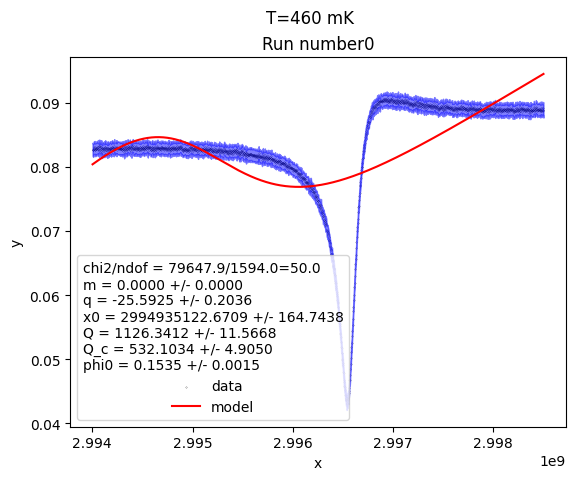

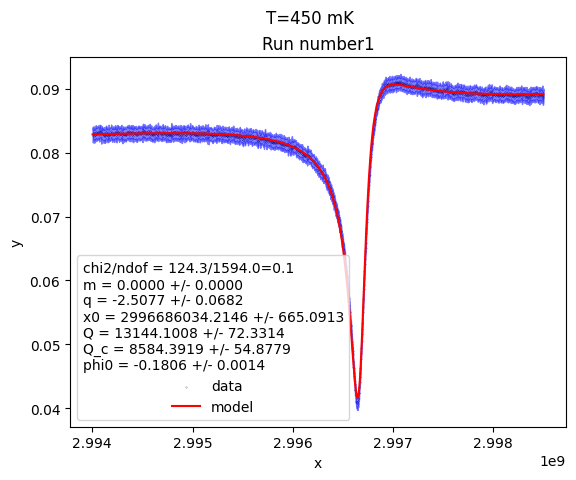

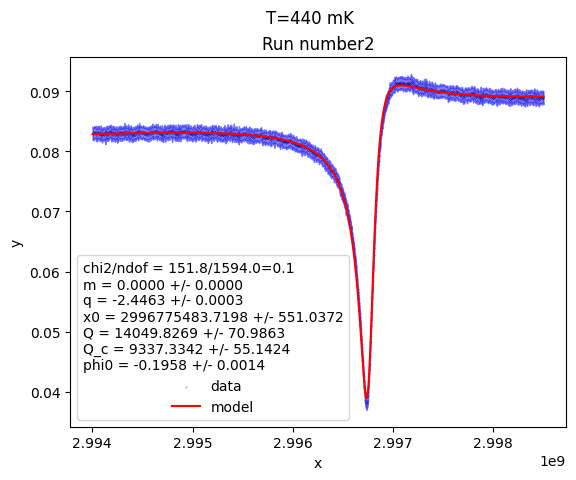

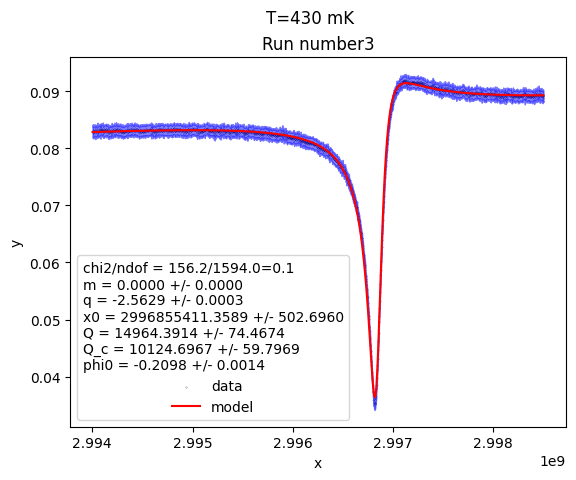

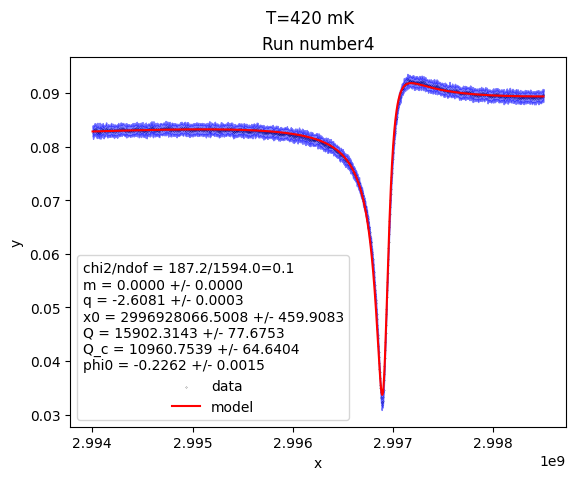

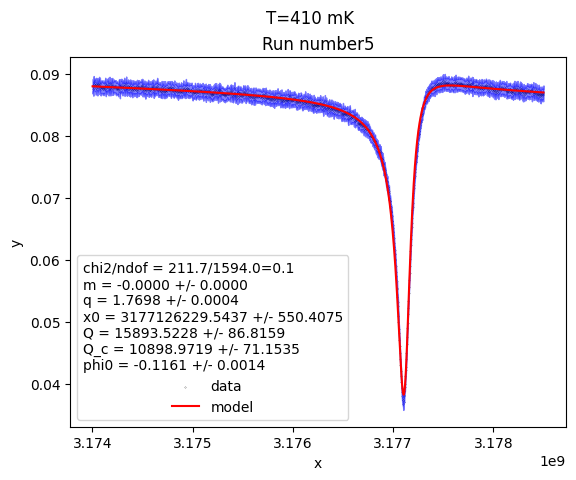

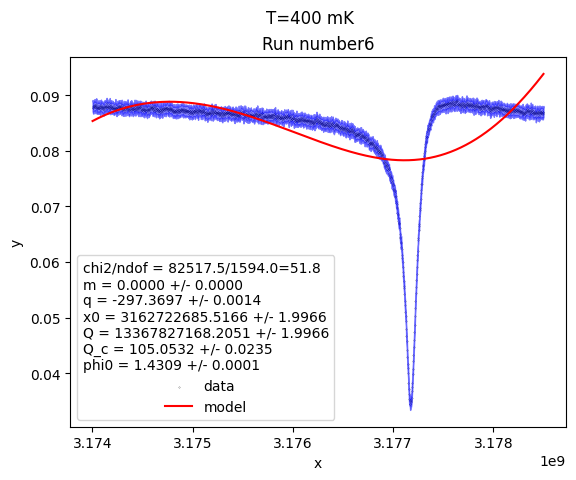

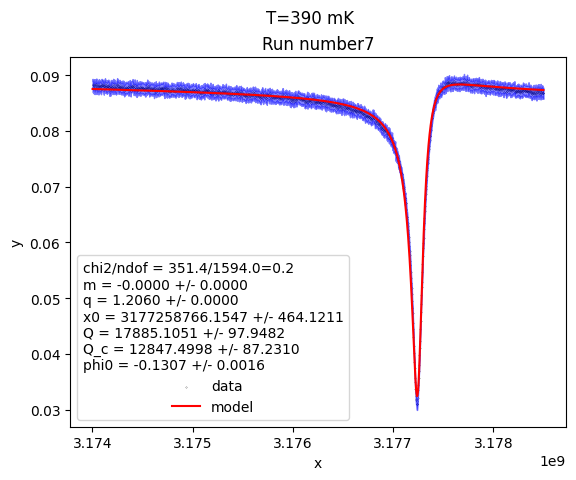

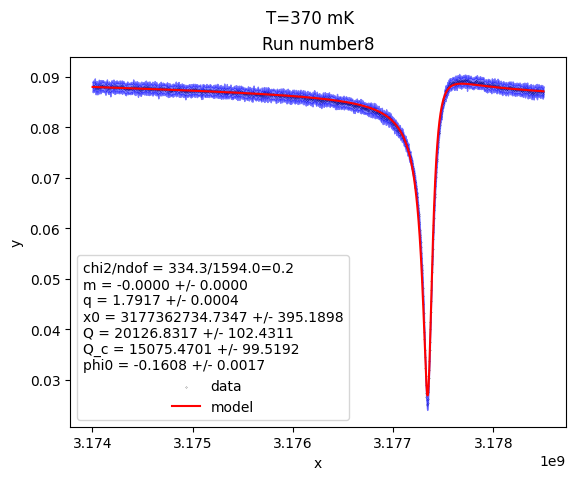

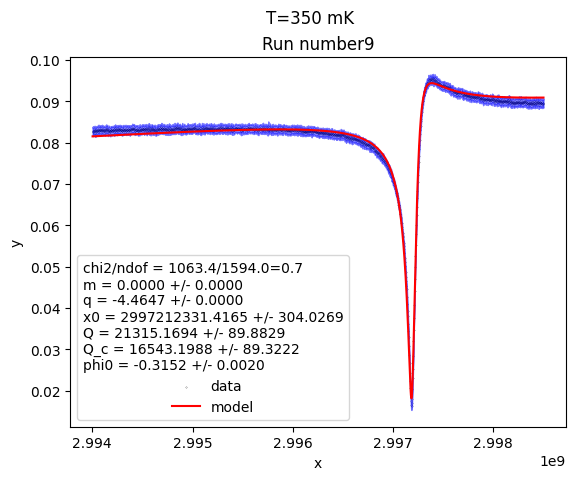

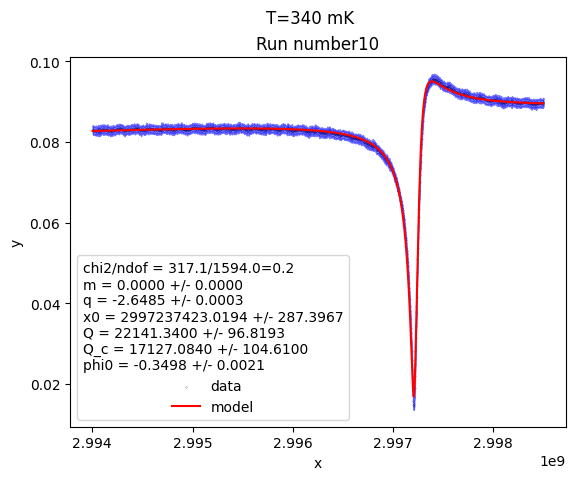

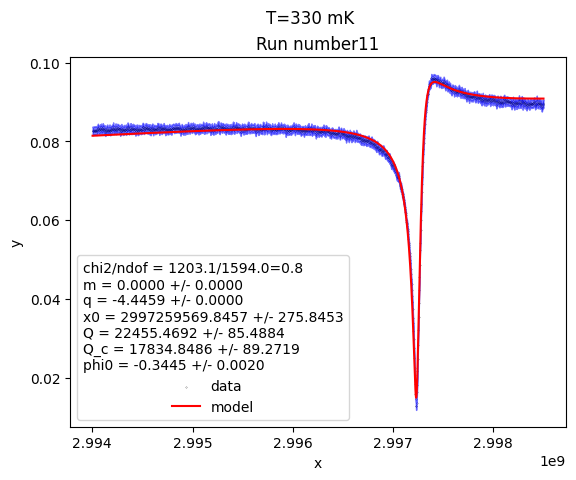

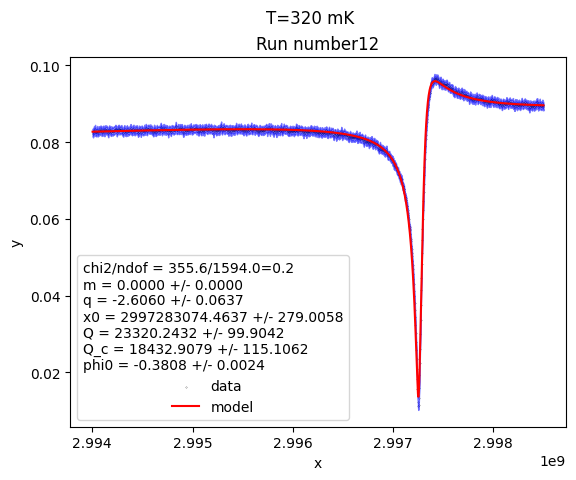

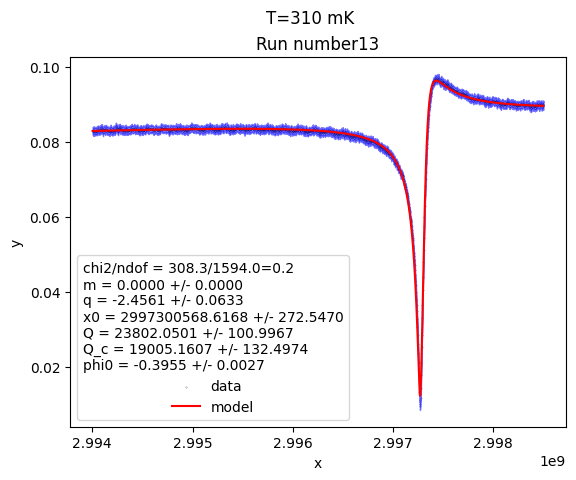

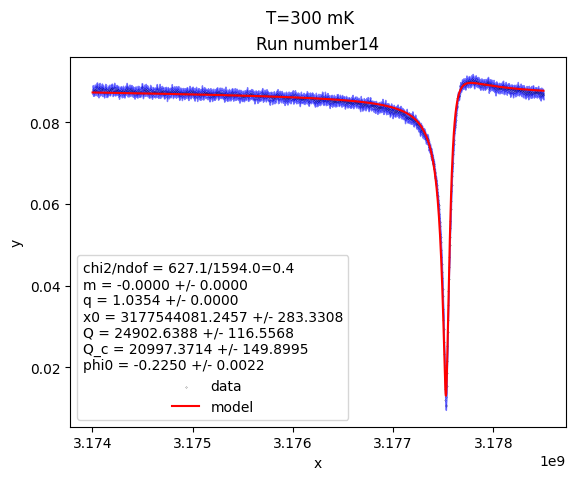

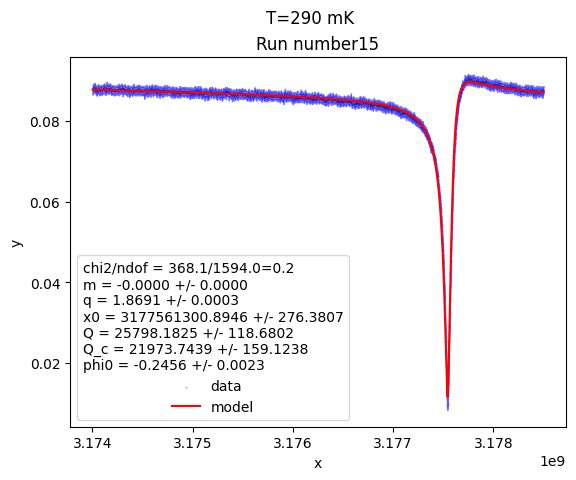

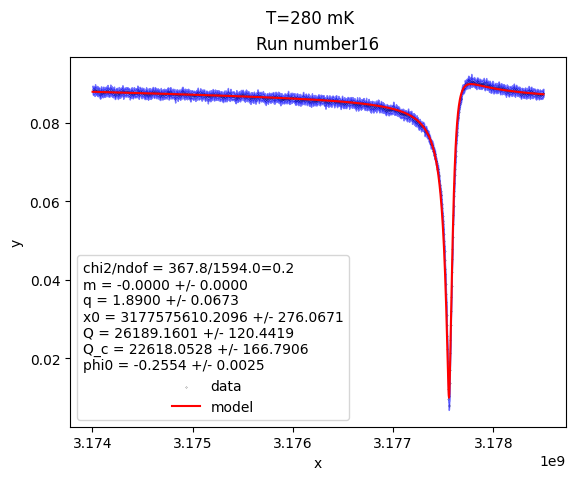

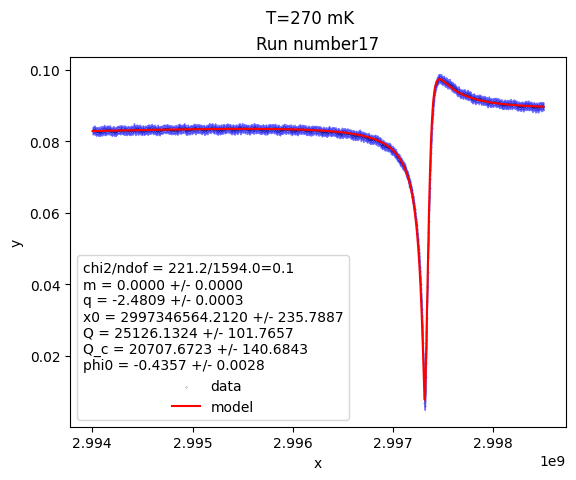

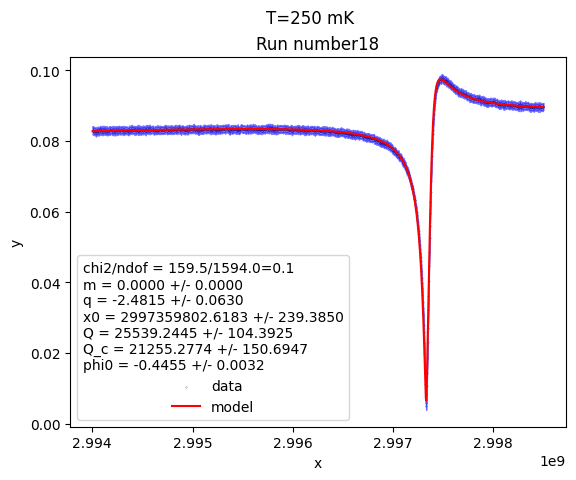

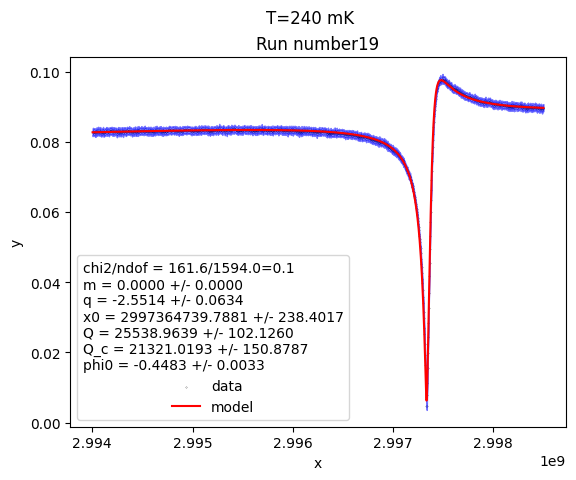

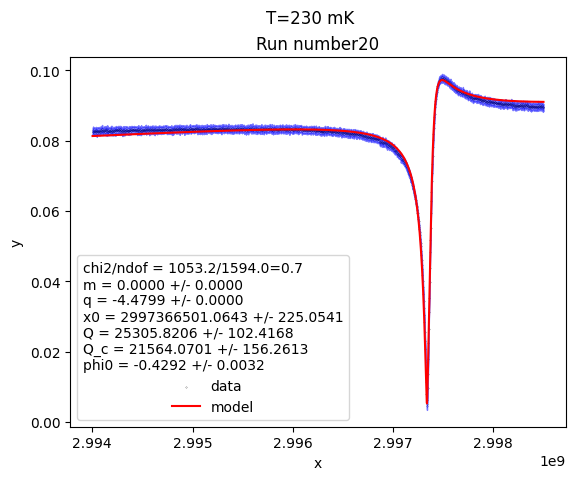

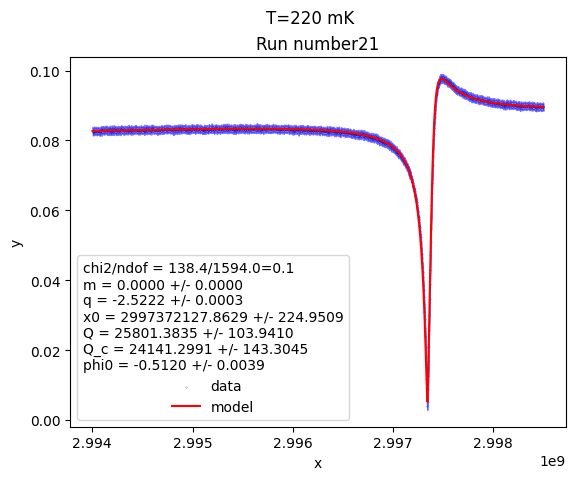

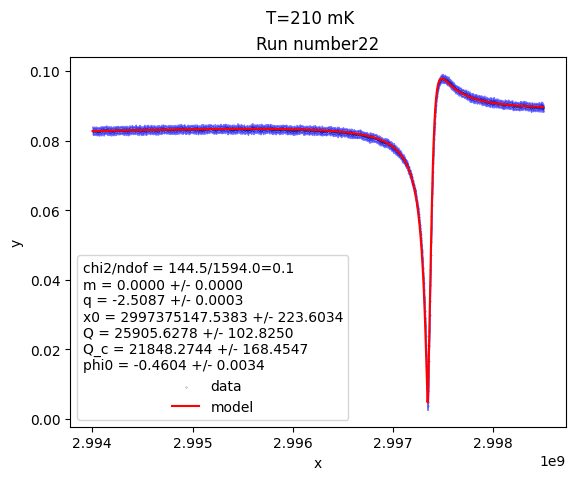

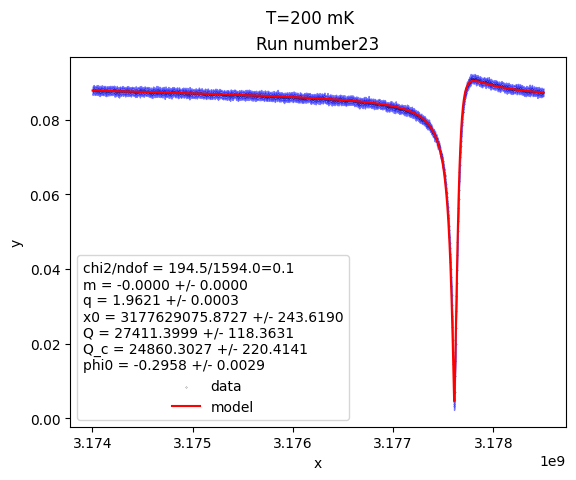

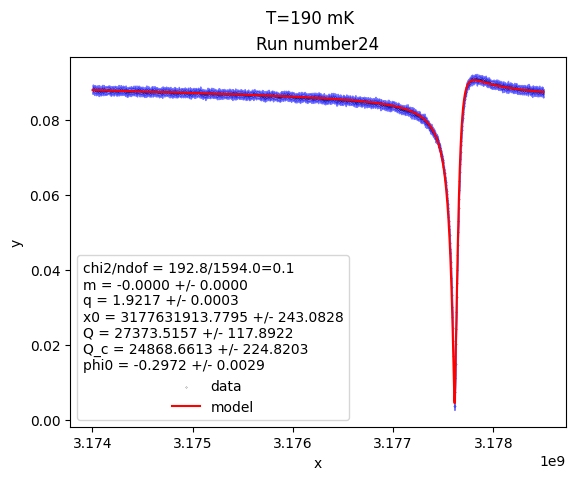

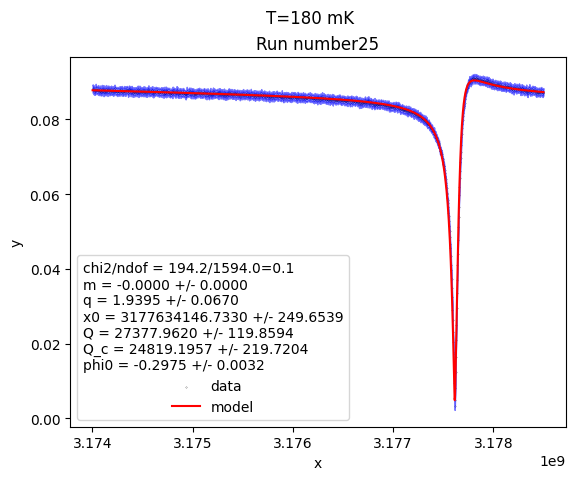

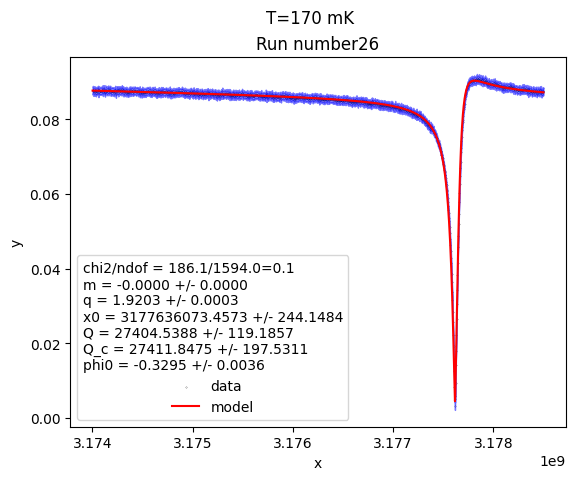

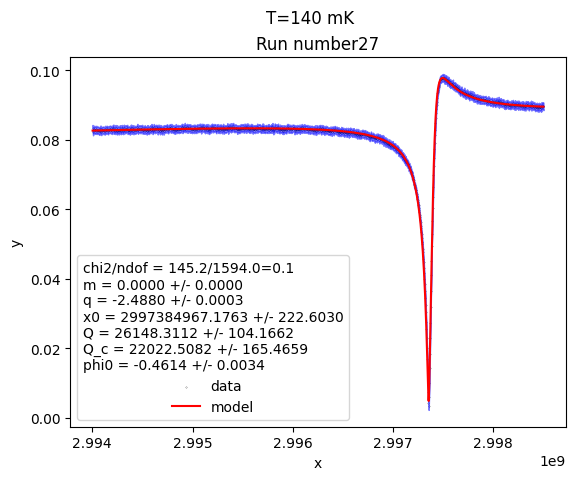

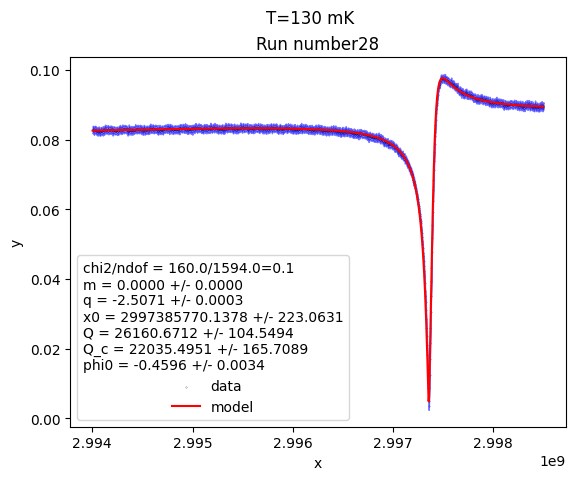

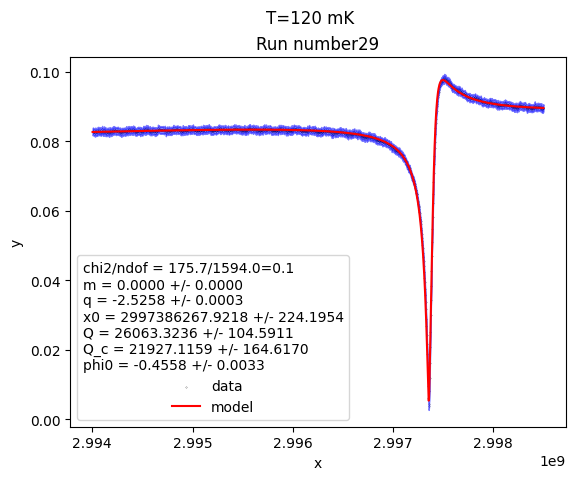

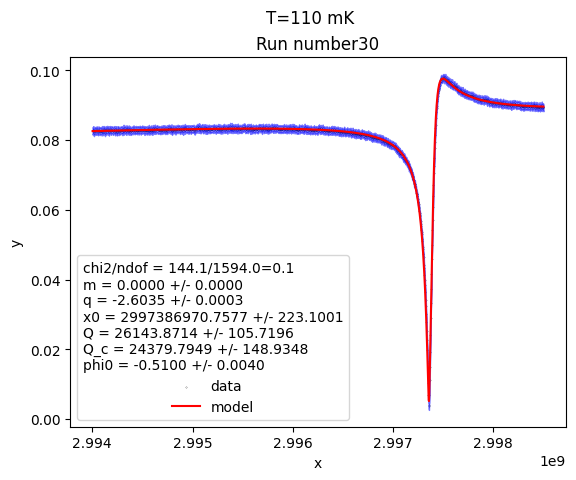

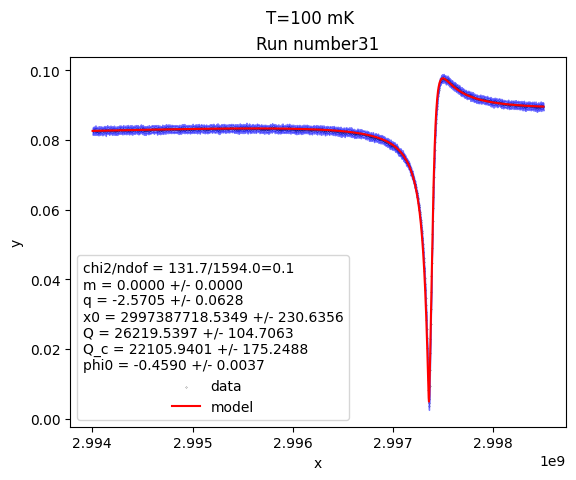

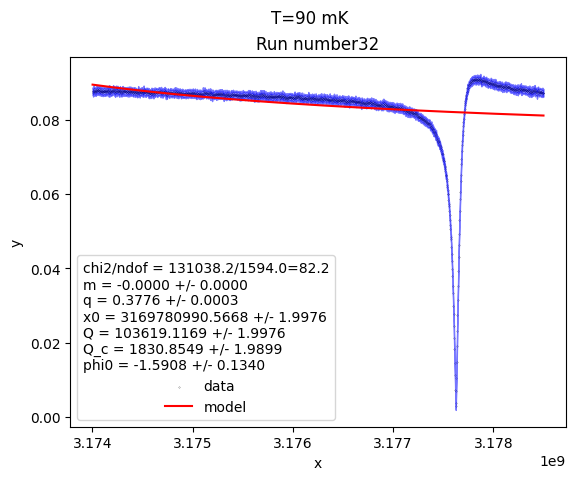

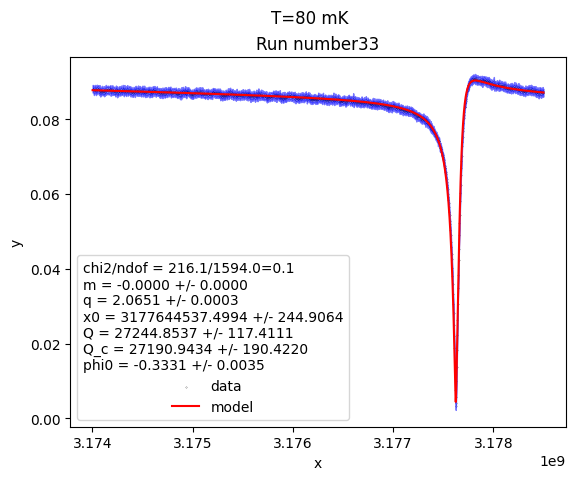

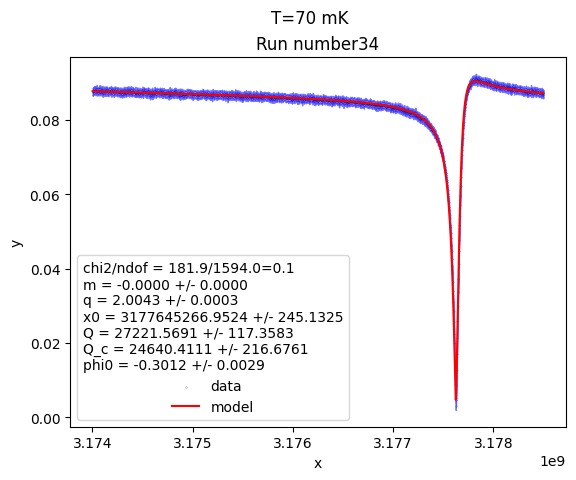

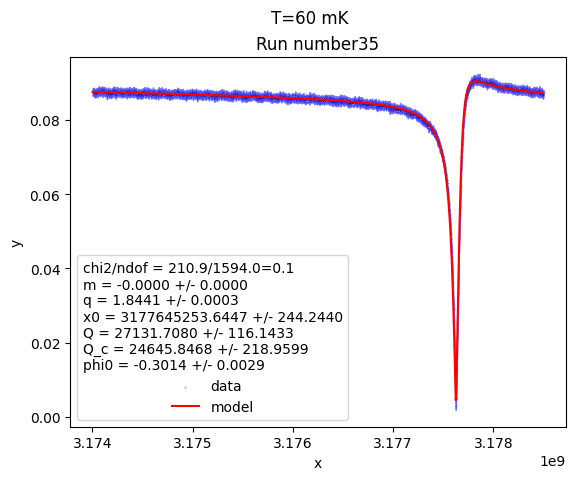

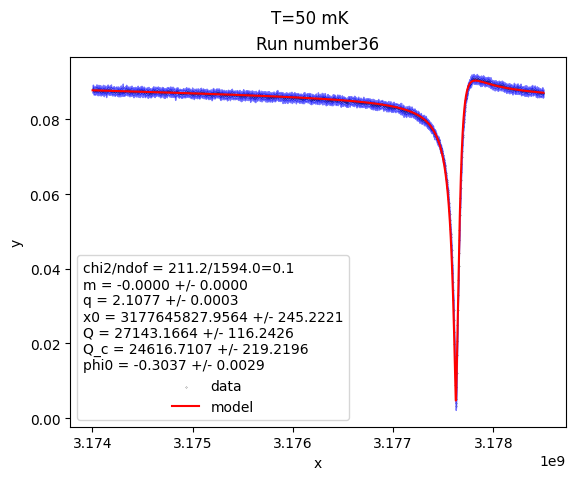

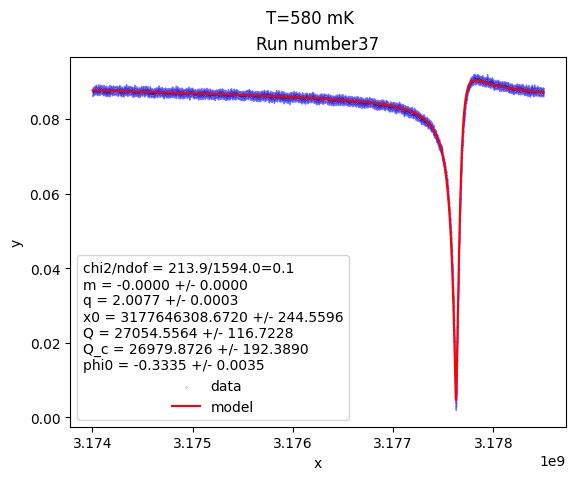

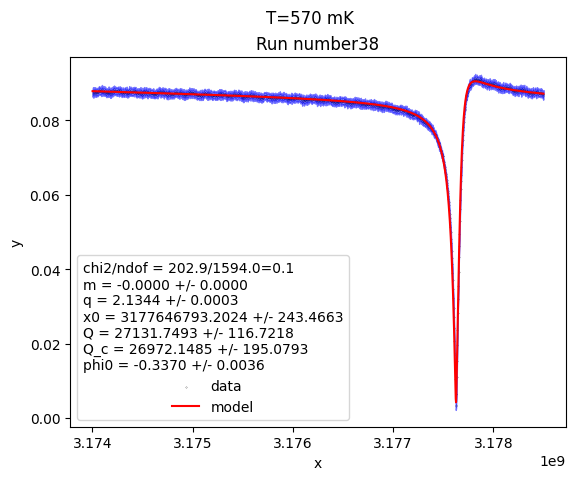

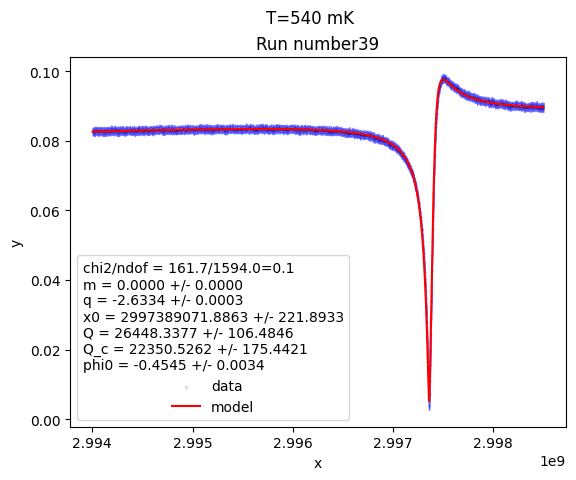

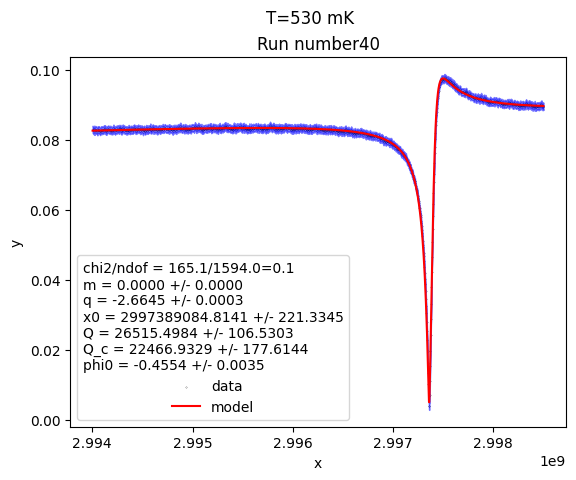

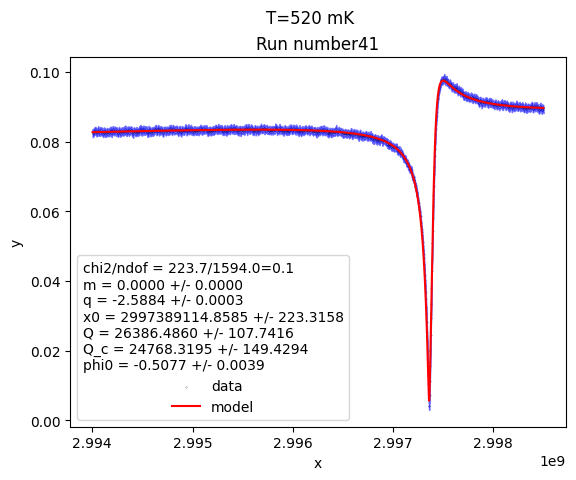

In [8]:
fig = plotter(m=m2,new_dfs=new_dfs2,t=new_temp2)

In [242]:
x,y = [], []
for i in range(len(m2)):
    y.append(m2[i].values[2]/1e9)
    x.append(new_temp2[i])

(3.175, 3.1778)

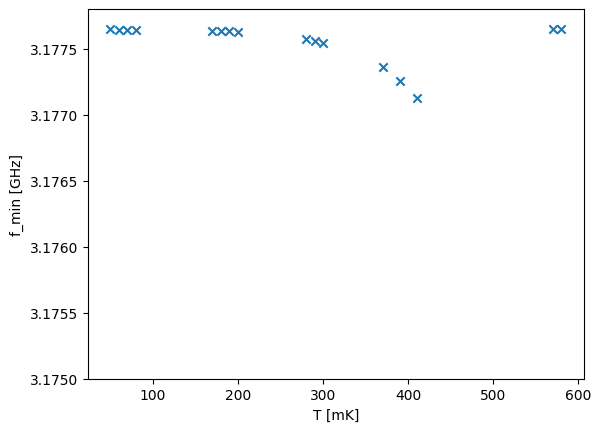

In [245]:
plt.scatter(x,y, marker='x')
plt.xlabel('T [mK]')
plt.ylabel('f_min [GHz]')
plt.ylim([3.175,3.1778])